# Assignment 1C - Question 2
## Semantic Person Search

In [1]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import keras
from keras import layers
from PIL import Image

import os
import datetime
import numpy

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.preprocessing.image import Iterator

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import pydot
import IPython
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
import imageio
import cv2

In [2]:
train = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Train.csv')
test = pd.read_csv('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Test.csv')

In [3]:
train_img = []
gnd = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Train_Data/Originals/*.png')
for myfile in files:
    im = keras.preprocessing.image.load_img(myfile,target_size=(268,160))
    image = keras.preprocessing.image.img_to_array(im)
    gnd.append(myfile[58:])

    train_img.append(image)

    
train_img = np.array(train_img)
train_img = train_img.astype('float32') / 255.



In [4]:
print(train_img[0])

[[[0.27450982 0.2784314  0.24705882]
  [0.27450982 0.2784314  0.24705882]
  [0.27450982 0.2784314  0.24705882]
  ...
  [0.3372549  0.3372549  0.2901961 ]
  [0.34509805 0.34509805 0.29803923]
  [0.34117648 0.34117648 0.29411766]]

 [[0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  ...
  [0.3372549  0.3372549  0.2901961 ]
  [0.34901962 0.34901962 0.3019608 ]
  [0.34509805 0.34509805 0.29803923]]

 [[0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  ...
  [0.34117648 0.34117648 0.29411766]
  [0.3529412  0.3529412  0.30588236]
  [0.34901962 0.34901962 0.3019608 ]]

 ...

 [[0.30980393 0.30980393 0.2627451 ]
  [0.30588236 0.30588236 0.25882354]
  [0.29803923 0.29803923 0.2509804 ]
  ...
  [0.4509804  0.44313726 0.39215687]
  [0.45490196 0.44705883 0.39607844]
  [0.45490196 0.44705883 0.39607844]]

 [[0.30980393 0.30980393 0.2627451 ]
  [0.30588236 0.30588236 0.25882354]


In [5]:
test_img = []
test_gnd = []
files = glob.glob('CAB420_Assessment_1C_Data/Data/Q2/Q2/Test_Data/Originals/*.png')
for myfile in files:
    im = keras.preprocessing.image.load_img(myfile,target_size=(268,160))
    image = keras.preprocessing.image.img_to_array(im)
    test_gnd.append(myfile[58:])
    test_img.append(image)

    
test_img = np.array(test_img)
test_img = test_img.astype('float32') / 255.


In [6]:
train = train.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])


train_gender = train.iloc[:,1]
train_gender = np.asarray(train_gender)
train_tortyp = train.iloc[:,2]
train_tortyp = np.asarray(train_tortyp)
train_torcol = train.iloc[:,3]
train_torcol = np.asarray(train_torcol)
train_legtyp = train.iloc[:,4]
train_legtyp = np.asarray(train_legtyp)
train_legcol = train.iloc[:,5]
train_legcol = np.asarray(train_legcol)
train_luggage = train.iloc[:,6] 
train_luggage = np.asarray(train_luggage)


In [7]:
test = test.drop(columns=['torcol2','torcol3','tortex','torcol3','legcol2','legcol3','legtex','pose'])

test_gender = test.iloc[:,1]
test_gender = np.asarray(test_gender)
test_tortyp = test.iloc[:,2]
test_tortyp = np.asarray(test_tortyp)
test_torcol = test.iloc[:,3]
test_torcol = np.asarray(test_torcol)
test_legtyp = test.iloc[:,4]
test_legtyp = np.asarray(test_legtyp)
test_legcol = test.iloc[:,5]
test_legcol = np.asarray(test_legcol)
test_luggage = test.iloc[:,6] 
test_luggage = np.asarray(test_luggage)

In [8]:
#fig = plt.figure(figsize=[20, 20])
#for i in range(100):
#    ax = fig.add_subplot(10, 10, i + 1)
#    ax.imshow(train_img[i])

In [9]:
#,tortyp,torcol,legtyp,legcol,luggage]
#, train_tortyp,train_torcol,train_legtyp,train_legcol,train_luggage]
#, test_tortyp, test_torcol, test_legtyp, test_legcol, test_luggage]

In [10]:
inputs = keras.Input(shape=(268, 160, 3, ), name='img')


x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='swish')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='swish')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='swish')(x)
gender = layers.Dense(3, name='gender_out')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='swish')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='swish')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='swish')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='swish')(x)
tortyp = layers.Dense(3, name='tortyp_out')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
torcol = layers.Dense(11, name='torcol_out')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
legtyp = layers.Dense(3, name='legtyp_out')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
legcol = layers.Dense(11, name='legocol_out')(x)

x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.SpatialDropout2D(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
luggage = layers.Dense(3, name='luggage_out')(x)

model_cnn = keras.Model(inputs=inputs, outputs=[gender, tortyp, torcol, legtyp, legcol, luggage], name='A1CQ2')


# inputs = keras.Input(shape=(50, 50, 3, ), name='img')
# x = layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(inputs)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = layers.MaxPool2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu')(x)
# outputs = layers.Dense(11, activation='softmax')(x)

# model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='SVHN_CNN_Model')


model_cnn.summary()

__________________
batch_normalization_6 (BatchNor (None, 268, 160, 8)  32          conv2d_13[0][0]                  
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 268, 160, 8)  32          conv2d_19[0][0]                  
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 268, 160, 8)  32          conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 268, 160, 8)  32          conv2d_31[0][0]                  
__________________________________________________________________________________________________
spatial_dropout2d (SpatialDropo (None, 268, 160, 8)  0           batch_normalization[0][0]        
__________________________________________________________________________________________

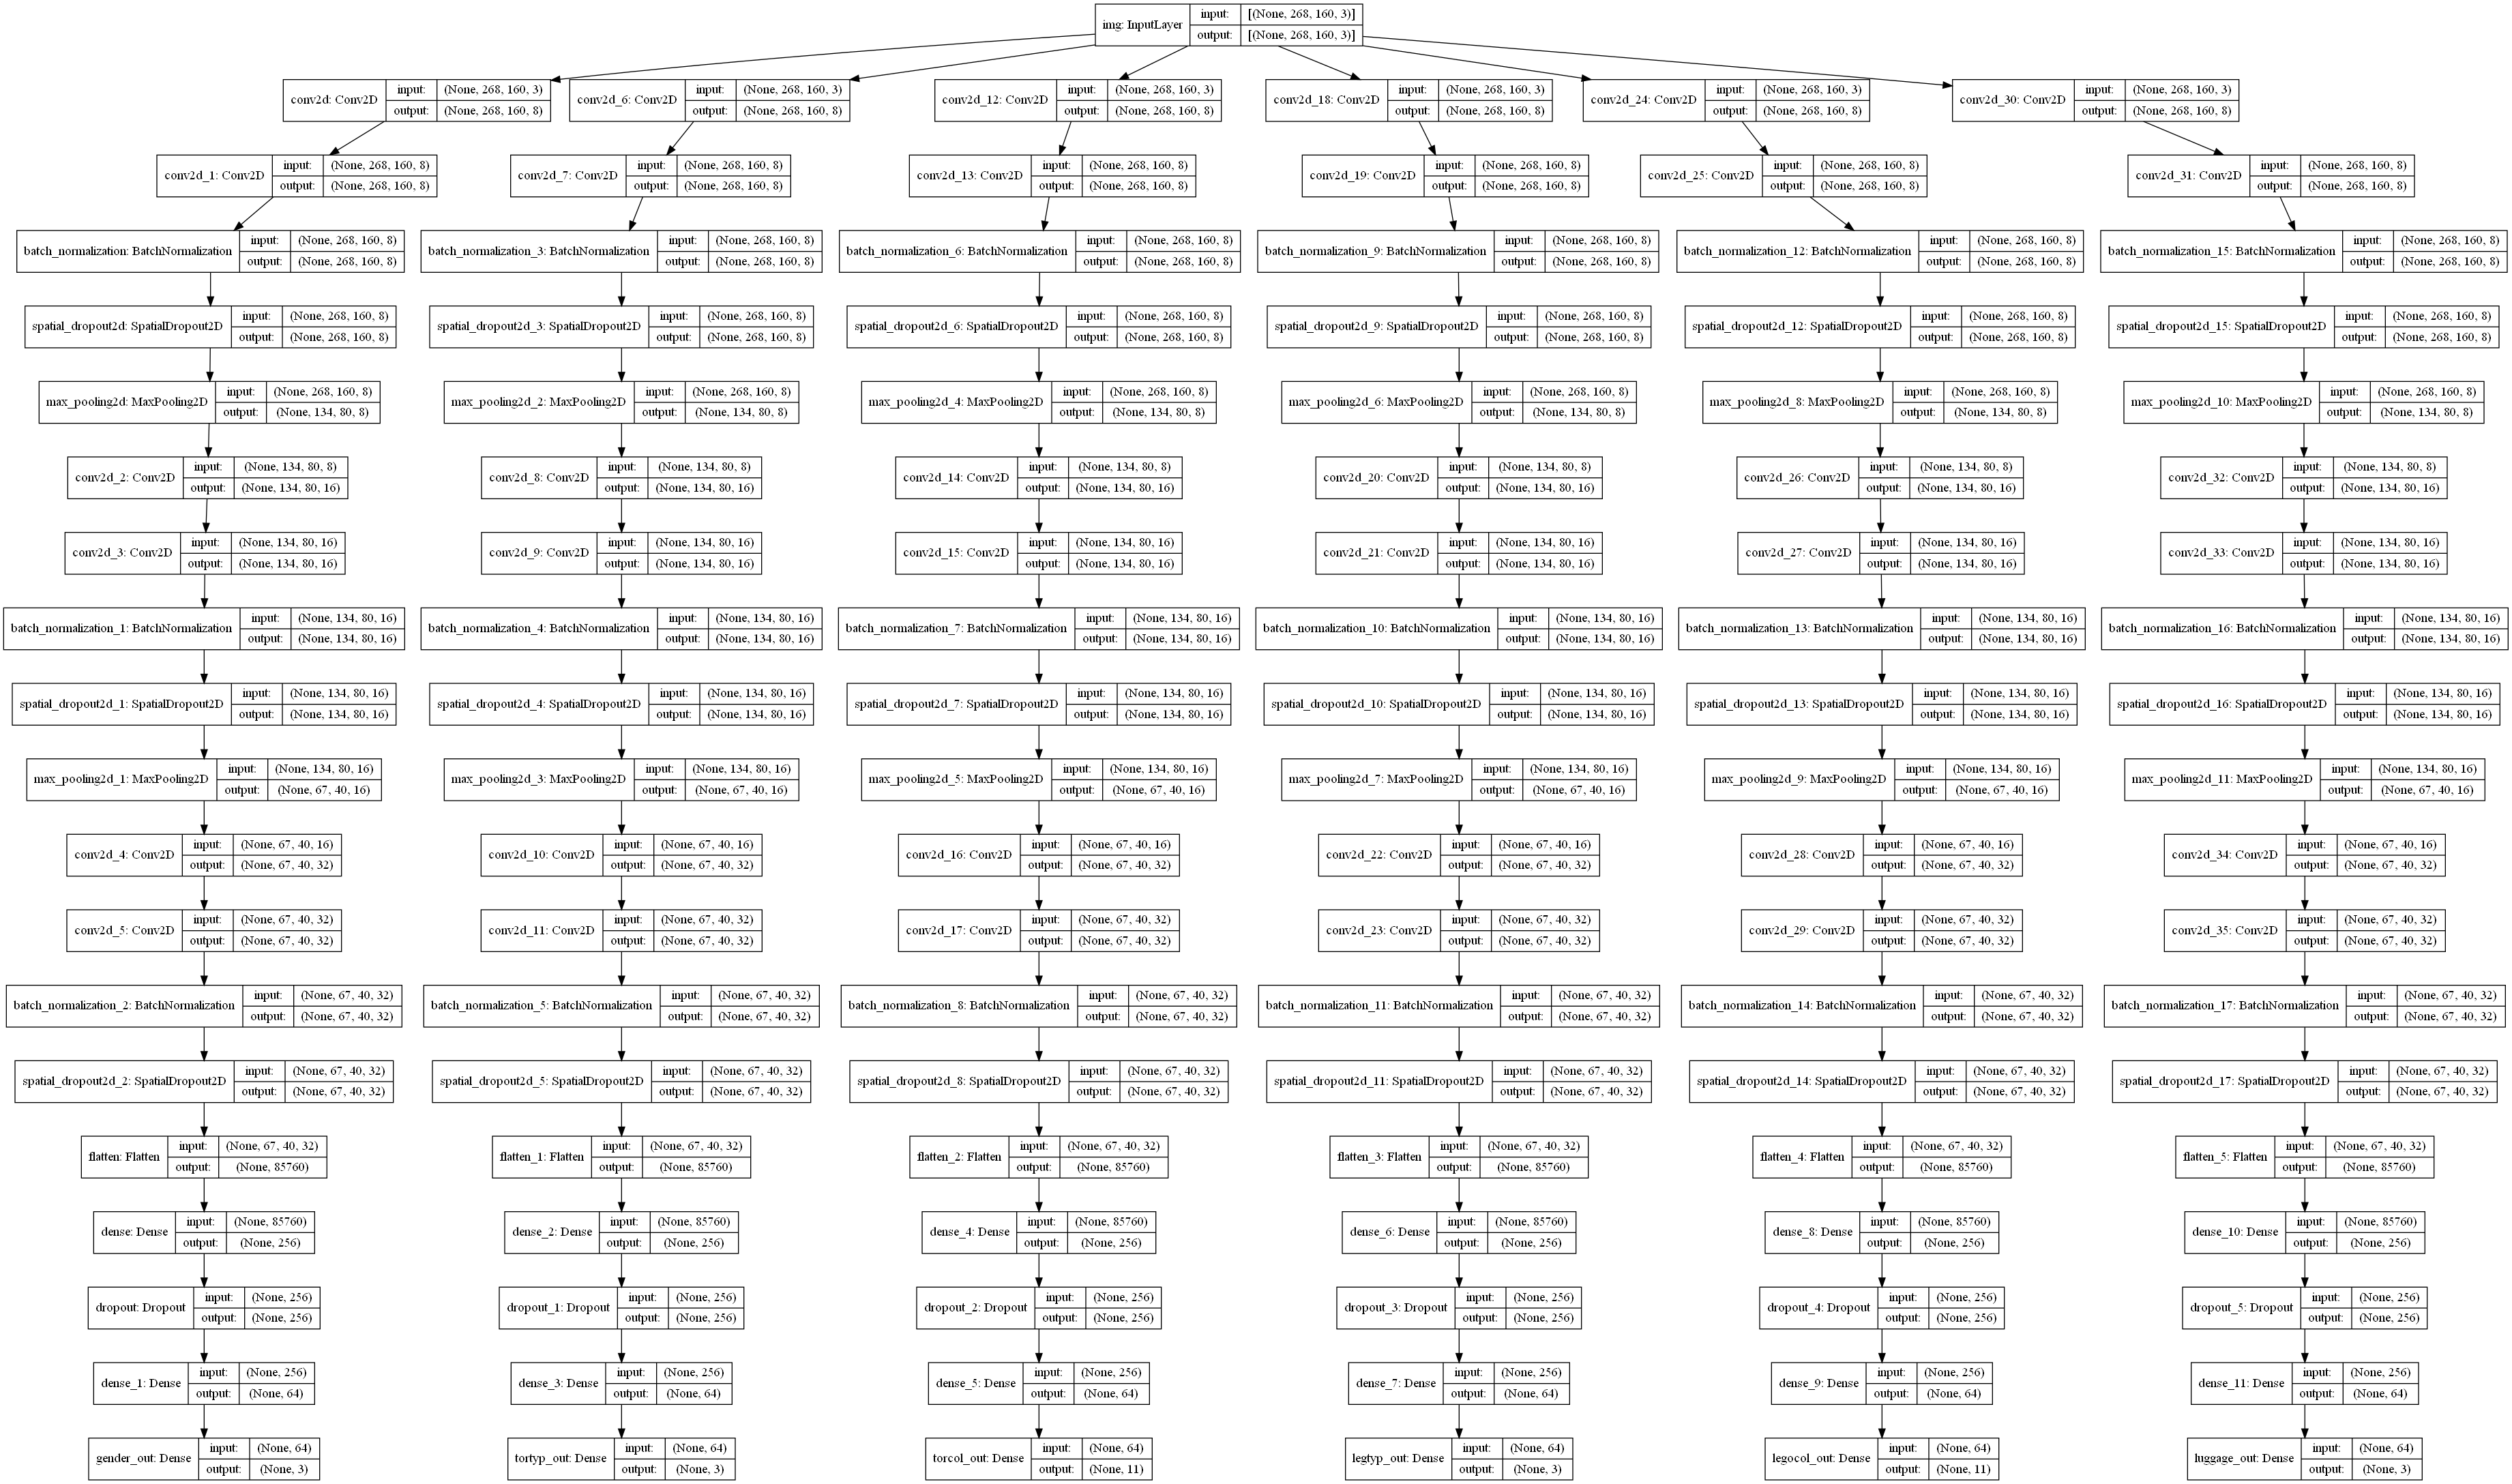

In [11]:
plot_model(model_cnn, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

In [12]:
model_cnn.compile(loss=['mean_squared_error', keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
              optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])

In [13]:
history = model_cnn.fit(train_img, [train_gender, train_tortyp, train_torcol, train_legtyp, train_legcol, train_luggage],
                    batch_size=64,
                    epochs=20,
                    validation_data=(test_img, [test_gender, test_tortyp, test_torcol, test_legtyp, test_legcol, test_luggage]),verbose=True)

Epoch 1/20
9/9 [==============================] - 38s 4s/step - loss: 685.1964 - gender_out_loss: 668.8911 - tortyp_out_loss: 16.3054 - gender_out_accuracy: 0.3519 - tortyp_out_accuracy: 0.4827 - torcol_out_accuracy: 0.1096 - legtyp_out_accuracy: 0.1115 - legocol_out_accuracy: 0.1596 - luggage_out_accuracy: 0.1654 - val_loss: 1.3725 - val_gender_out_loss: 0.6103 - val_tortyp_out_loss: 0.7622 - val_gender_out_accuracy: 0.0000e+00 - val_tortyp_out_accuracy: 0.6173 - val_torcol_out_accuracy: 0.0816 - val_legtyp_out_accuracy: 0.0102 - val_legocol_out_accuracy: 0.1071 - val_luggage_out_accuracy: 0.0408
Epoch 2/20
9/9 [==============================] - 33s 4s/step - loss: 138.9341 - gender_out_loss: 132.3923 - tortyp_out_loss: 6.5418 - gender_out_accuracy: 0.3558 - tortyp_out_accuracy: 0.5673 - torcol_out_accuracy: 0.0942 - legtyp_out_accuracy: 0.1500 - legocol_out_accuracy: 0.1519 - luggage_out_accuracy: 0.1962 - val_loss: 1.3203 - val_gender_out_loss: 0.5989 - val_tortyp_out_loss: 0.7215 -